<a href="https://colab.research.google.com/github/RoseMwangi98/CARREFOUR_ANALYSIS/blob/main/FEATURE_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFINING THE QUESTION**

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**Part 2: Feature Selection**

This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

In [7]:
#installing the required library that are needed
install.packages("plyr")
install.packages("tidyverse")
install.packages("skimr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
#load the dataset
feature <- read.csv("http://bit.ly/CarreFourDataset")
head(feature,3)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255


In [10]:
library(skimr)
skim(feature)

── Data Summary ────────────────────────
                           Values 
Name                       feature
Number of rows             1000   
Number of columns          16     
_______________________           
Column type frequency:            
  character                8      
  numeric                  8      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Invoice.ID            0             1    11    11     0     1000          0
2 Branch                0             1     1     1     0        3          0
3 Customer.type         0             1     6     6     0        2          0
4 Gender                0             1     4     6     0        2          0
5 Product.line          0             1    17    22     0        6          0
6 Date                  0             1     8     9     0  

In [11]:
summary(feature)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

**DATA CLEANING**

In [ ]:
#finding missing values
sum(rowSums(is.na(feature)))

[1] 0

In [ ]:
sum(colSums(is.na(feature)))

[1] 0

In [ ]:
#finding duplicates
sum(duplicated(feature))

[1] 0

**PERFORMING FEATURE SELECTION**

**1.FILTER METHOD**


In [4]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)


# Installing and loading the corrplot package for plotting
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)


In [12]:
library(dplyr)
feature = select(feature ,-1,-2,-3,-4,-5,-9,-10,-11,-16,-13)
head(feature)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1
2,15.28,5,3.8200,76.40,3.8200,9.6
3,46.33,7,16.2155,324.31,16.2155,7.4
4,58.22,8,23.2880,465.76,23.2880,8.4
5,86.31,7,30.2085,604.17,30.2085,5.3
6,85.39,7,29.8865,597.73,29.8865,4.1


In [13]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(feature)

In [20]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggcorrplot")
# Loading
library(ggcorrplot)

Loading required package: devtools

Loading required package: usethis





✔  checking for file ‘/tmp/RtmpatFFSE/remotes3d3aa1387a/kassambara-ggcorrplot-ad71a16/DESCRIPTION’
─  preparing ‘ggcorrplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘ggcorrplot_0.1.3.999.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



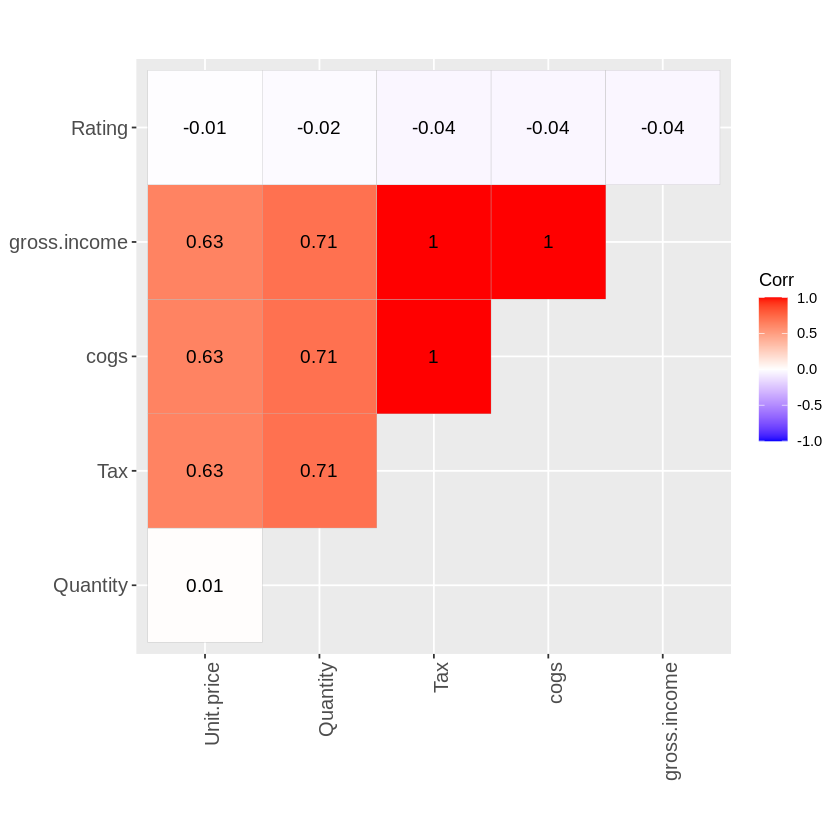

In [21]:
#plotting the features in a graph
library(ggcorrplot)
library(corrplot)
ggcorrplot(correlationMatrix ,hc.order=F,lab=T, type = 'upper' , tl.srt=90 , ggtheme = ggplot2::theme_gray, )

In [15]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
# ---
# 
highlyCorrelated

names(feature[,highlyCorrelated])

[1] 3 4

[1] "Tax"  "cogs"

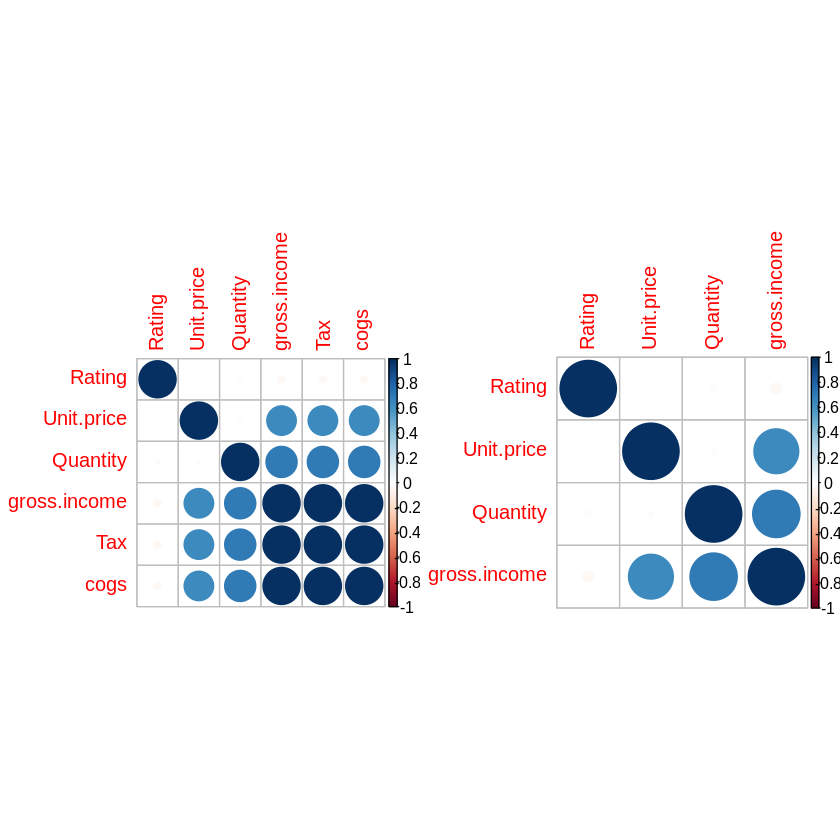

In [22]:

# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
Dataset2<-feature[-highlyCorrelated]

# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")

corrplot(cor(Dataset2), order = "hclust")

After we conducted our filter method in our dataset,we remained with our most important columns in the dataset namely:

+ Rating
+ Unit price
+ Quantity
+ gross.income

**WRAPPER METHODS**

In [1]:
library(dplyr)
df <- read.csv("http://bit.ly/CarreFourDataset")
df <- select(df , -1,-2,-3,-4,-5,-9,-10,-11,-13,-16)
head(df,5)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Unit.price,Quantity,Tax,cogs,gross.income,Rating
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1
2,15.28,5,3.8200,76.40,3.8200,9.6
3,46.33,7,16.2155,324.31,16.2155,7.4
4,58.22,8,23.2880,465.76,23.2880,8.4
5,86.31,7,30.2085,604.17,30.2085,5.3


In [2]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)

In [3]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G   BICdiff Decision
          Quantity          Add  -4308.761     E 9  687.4466 Accepted
              cogs          Add -16306.851   VEV 9 1083.0132 Accepted
        Unit.price          Add -21393.079   EVV 7 2812.3733 Accepted
        Unit.price       Remove -16306.851   VEV 9 2812.3733 Rejected
            Rating          Add -25510.859   EVV 7 -184.0917 Rejected
        Unit.price       Remove -16306.851   VEV 9 2812.3733 Rejected

Selected subset: Quantity, cogs, Unit.price

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood    n df       BIC       ICL
      -11651.57 1000 29 -23503.46 -23601.14

Clustering table:
  1   2   3 
309 376 315 

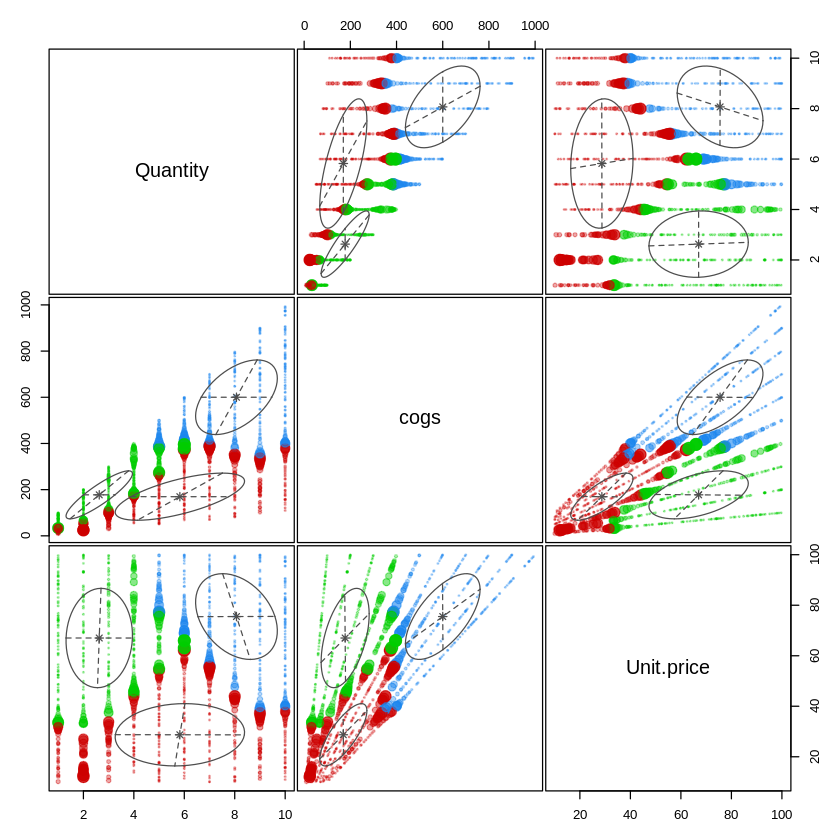

In [4]:
out = clustvarsel(df)
out

#I then used the selected subset from the features above.

#The Selected subset: Quantity, cogs, Unit.price

Subset1 = df[,out$subset]
mod = Mclust(Subset1 , G = 1:3)
summary(mod)

plot(mod,c("uncertainty"))

**EMBEDDED METHODS**

In [45]:
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: lattice

Loading required package: latticeExtra

Loading required package: fpc

